In [1]:
from sklearn.datasets import load_digits 
from sklearn import metrics
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<Figure size 640x480 with 0 Axes>

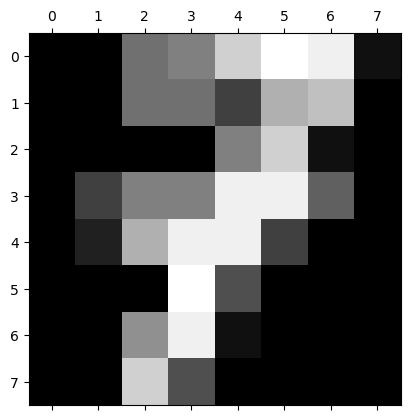

In [3]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[7]) 
plt.show()

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.6, shuffle=False)


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       105
           1       0.96      0.98      0.97       110
           2       0.97      0.96      0.97       105
           3       0.98      0.89      0.93       109
           4       0.99      0.95      0.97       111
           5       0.94      0.97      0.95       109
           6       0.99      0.97      0.98       109
           7       0.96      0.99      0.98       108
           8       0.94      0.88      0.91       104
           9       0.88      0.98      0.93       109

    accuracy                           0.96      1079
   macro avg       0.96      0.96      0.96      1079
weighted avg       0.96      0.96      0.96      1079




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix:
[[104   0   0   0   1   0   0   0   0   0]
 [  0 108   1   0   0   1   0   0   0   0]
 [  1   0 101   1   0   0   0   1   0   1]
 [  0   0   0  97   0   3   0   3   6   0]
 [  0   0   0   0 106   0   0   0   0   5]
 [  0   0   0   0   0 106   1   0   0   2]
 [  1   1   0   0   0   1 106   0   0   0]
 [  0   0   0   0   0   1   0 107   0   0]
 [  0   4   2   0   0   0   0   0  91   7]
 [  0   0   0   1   0   1   0   0   0 107]]

Accuracy of the Algorithm:  0.9573679332715477


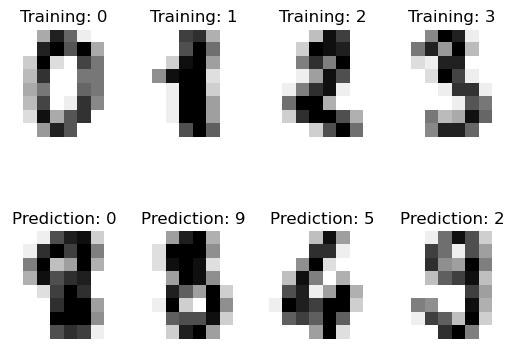

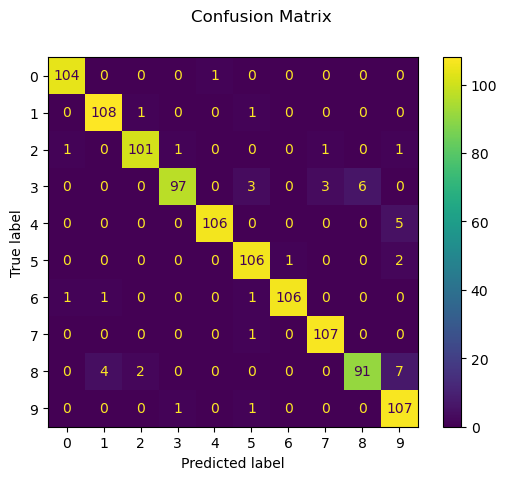

In [6]:
from sklearn import svm
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)
predicted = svm_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (svm_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", svm_classifier.score(X_test, y_test))
svm = svm_classifier.score(X_test, y_test)
plt.show()


Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       105
           1       0.65      0.52      0.58       110
           2       0.69      0.69      0.69       105
           3       0.71      0.70      0.70       109
           4       0.75      0.68      0.72       111
           5       0.62      0.82      0.70       109
           6       0.84      0.74      0.79       109
           7       0.78      0.74      0.76       108
           8       0.51      0.53      0.52       104
           9       0.62      0.62      0.62       109

    accuracy                           0.70      1079
   macro avg       0.70      0.70      0.70      1079
weighted avg       0.70      0.70      0.70      1079




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix:
[[102   0   0   0   3   0   0   0   0   0]
 [  0  57   2   2   3  11   3   6  14  12]
 [  3   2  72   7   3   2   0   0  10   6]
 [  0   6   5  76   0   5   0   1   6  10]
 [  6   6   0   1  76   3  10   7   0   2]
 [  2   2   0   5   3  89   1   2   0   5]
 [  0   5  12   2   1   2  81   0   5   1]
 [  0   0   0   2   6   6   0  80  14   0]
 [  2   9  10   6   3  10   2   1  55   6]
 [  3   1   3   6   3  16   0   6   3  68]]

Accuracy of the Algorithm:  0.70064874884152


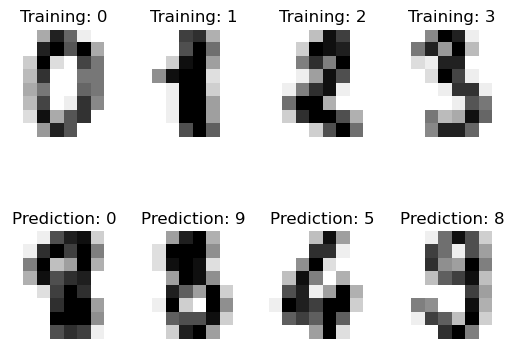

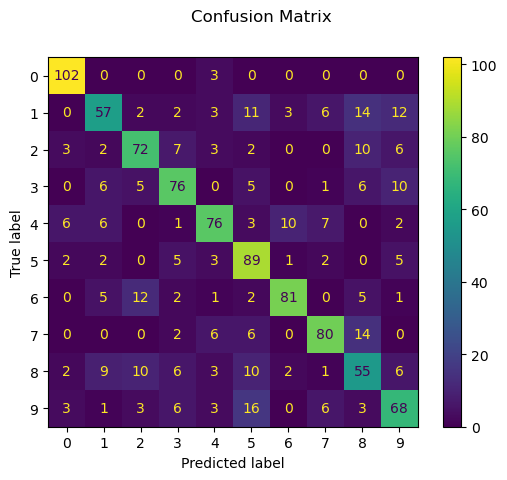

In [7]:
from sklearn import tree
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
predicted = dt_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (dt_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(dt_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", dt_classifier.score(X_test, y_test))
dt = dt_classifier.score(X_test, y_test)
plt.show()


Classification report for classifier RandomForestClassifier(max_depth=2, random_state=0):
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       105
           1       0.80      0.29      0.43       110
           2       0.72      0.81      0.76       105
           3       0.56      0.85      0.68       109
           4       0.90      0.81      0.85       111
           5       0.88      0.70      0.78       109
           6       0.85      0.96      0.91       109
           7       0.61      1.00      0.76       108
           8       0.80      0.34      0.47       104
           9       0.80      0.72      0.75       109

    accuracy                           0.75      1079
   macro avg       0.77      0.75      0.73      1079
weighted avg       0.77      0.75      0.73      1079



Confusion matrix:
[[104   0   0   0   1   0   0   0   0   0]
 [  0  32  11  12   7   1   0  30   9   8]
 [  1   0  85  16   0   0   1   0   0   2]
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Accuracy of the Algorithm:  0.7469879518072289


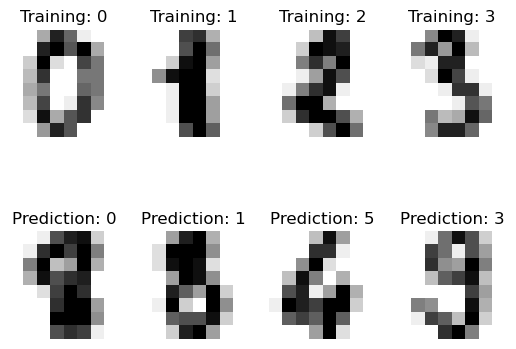

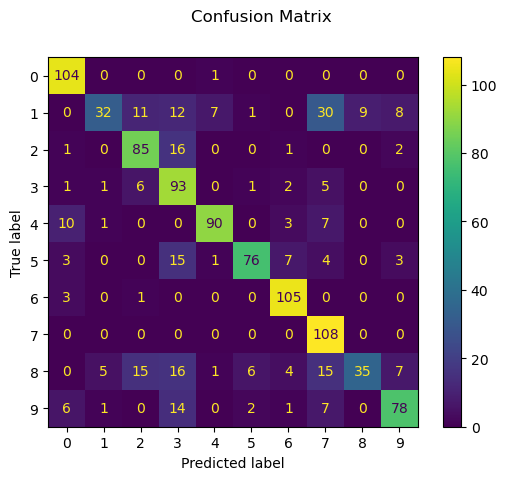

In [8]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(max_depth=2, random_state=0)
RF_classifier.fit(X_train, y_train)
predicted = RF_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (RF_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(RF_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", RF_classifier.score(X_test, y_test))
rf = RF_classifier.score(X_test, y_test)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



Classification report for classifier KNeighborsClassifier(metric='euclidean'):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       0.94      0.95      0.95       110
           2       0.95      0.93      0.94       105
           3       0.91      0.94      0.93       109
           4       1.00      0.94      0.97       111
           5       0.97      0.98      0.98       109
           6       0.99      0.99      0.99       109
           7       0.95      1.00      0.97       108
           8       0.92      0.86      0.89       104
           9       0.93      0.94      0.93       109

    accuracy                           0.95      1079
   macro avg       0.95      0.95      0.95      1079
weighted avg       0.95      0.95      0.95      1079




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



Confusion matrix:
[[105   0   0   0   0   0   0   0   0   0]
 [  0 105   1   0   0   0   0   0   4   0]
 [  1   0  98   5   0   0   0   1   0   0]
 [  0   0   0 103   0   1   0   2   3   0]
 [  0   0   0   0 104   0   0   2   0   5]
 [  0   0   0   0   0 107   1   0   0   1]
 [  1   0   0   0   0   0 108   0   0   0]
 [  0   0   0   0   0   0   0 108   0   0]
 [  0   7   4   1   0   0   0   1  89   2]
 [  0   0   0   4   0   2   0   0   1 102]]

Accuracy of the Algorithm:  0.953660797034291


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

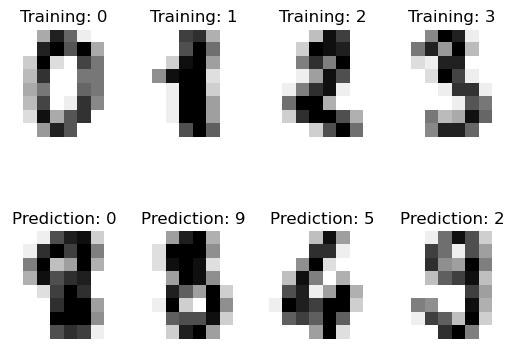

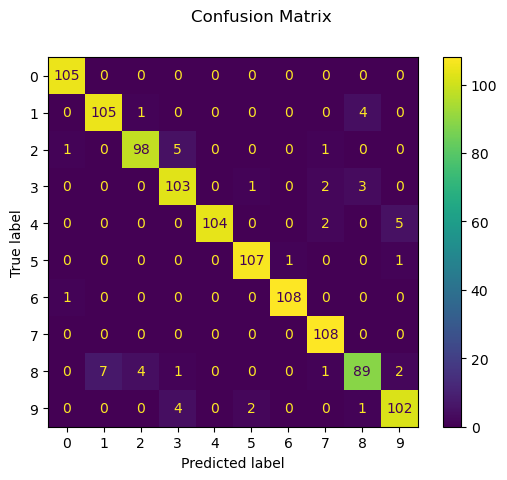

In [9]:
#knn
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(X_train, y_train)
predicted = KNN_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(KNN_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", KNN_classifier.score(X_test, y_test))
knn = KNN_classifier.score(X_test, y_test)
plt.show()

In [10]:
model = pd.DataFrame({'Model': ['SVM', 'Decision Tree', 'Random Forest','KNN'], 'Score': [svm, dt, rf, knn]})
model_accuracy = model.sort_values(by = 'Score', ascending = False)
model_accuracy = model_accuracy.set_index('Score')
model_accuracy

,Model
Score,
0.957368,SVM
0.953661,KNN
0.746988,Random Forest
0.700649,Decision Tree
